In [1]:
import gpforecaster as gpf
import tsaugmentation as tsag
import matplotlib.pyplot as plt

In [2]:
dataset_name = 'prison'
dataset = tsag.preprocessing.PreprocessDatasets('prison')
groups = dataset.apply_preprocess()

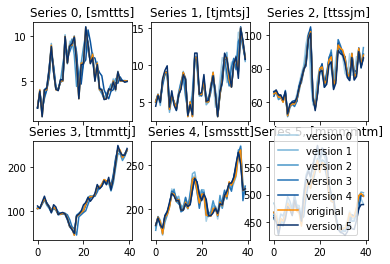

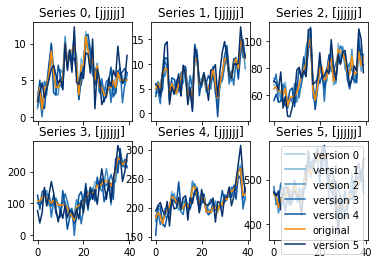

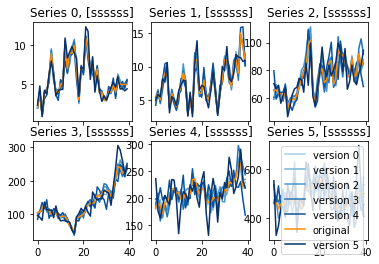

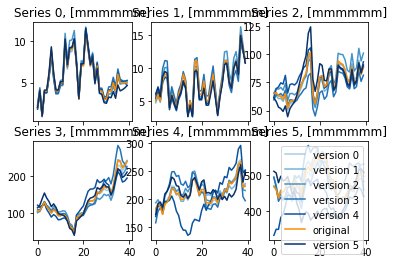

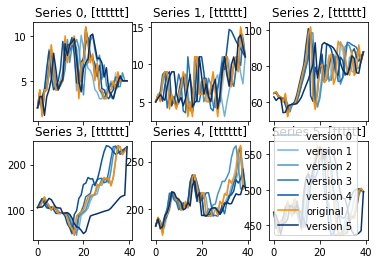

In [3]:
prison = tsag.transformations.CreateTransformedVersions('prison')
prison.create_new_version_single_transf()

In [4]:
vis = tsag.visualization.Visualizer('prison')

In [5]:
for k in ['jitter', 'scaling', 'magnitude_warp', 'time_warp']:
    vis._read_files(f'single_transf_{k}')
    for i in range(6):
        for j in range(10):
            groups['train']['data'] = vis.y_new[i, j]
            gpf_model = gpf.model.GPF(f'./results_{dataset_name}/results_{dataset_name}_{k}_v{i}_s{j}', groups)
            model, like = gpf_model.train()
            mean, lower, upper = gpf_model.predict(model, like)
            res = gpf_model.metrics(mean)
            gpf_model.store_metrics(res)